# Logistic Regression on MNIST

This is MLP (784-10) on MNIST. Adam algorithm (lr=0.001) with 100 epoches.


#### Original Method

    Total params: 7,850
    Trainable params: 7,850
    Non-trainable params: 0

    
####  LR with 7840 intrinsic dim    
    Total params: 61,559,690
    Trainable params: 7,840
    Non-trainable params: 61,551,850 

In [32]:
import os, sys
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline

In [33]:
results_dir = '../results'


class Results():
    def __init__(self):
        self.train_loss     = []
        self.train_accuracy = []
        self.train_loss = []
        self.valid_loss = []
        self.run_time   = []
        
    def add_entry(self, train_loss, train_accuracy, valid_loss, valid_accuracy, run_time):
        self.train_loss.append(train_loss)
        self.train_accuracy.append(train_accuracy)
        self.train_loss.append(train_loss)
        self.valid_loss.append(valid_loss)
        self.run_time.append(run_time)
      
    def add_entry_list(self, entry):
        self.add_entry(entry[0], entry[1], entry[2], entry[3], entry[4])
        
    def list2np(self):
        self.train_loss     = []
        self.train_accuracy = []
        self.train_loss = []
        self.valid_loss = []
        self.run_time   = []        

dim = [10, 50, 100, 300, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 7840, 7850]
i = 0        

# filename list of diary
diary_names = []
for subdir, dirs, files in os.walk(results_dir):
    for file in files:
        if file == 'diary':
            fname = os.path.join(subdir, file)
            diary_names.append(fname)

            
diary_names_ordered = []
for d in dim:
    for f in diary_names:
        if ('_'+str(d)+'/' in f) and ('fnn_mnist_200_200' not in f):
            print "%d is in" % d + f
            diary_names_ordered.append(f)
        if '170705_214554_ae92905_master_mnist_fnn_dir/' in f:
            diary_names_dir = f
         
print diary_names_ordered    
        
# extrinsic update  method
with open(diary_names_dir,'r') as ff:
    lines0 = ff.readlines()
    R_dir = extract_num(lines0)

print "LR model:\n" + str(R_dir) + "\n"

# intrinsic update method
Rs = []
i = 0
for fname in diary_names_ordered:
    with open(fname,'r') as ff:
        lines0 = ff.readlines()
        R = extract_num(lines0)
        print "%d dim:\n"%dim[i] + str(R) + "\n"
        i += 1

        Rs.append(R)
                            
Rs = np.array(Rs)




10 is in../results/lr_mnist/170705_212527_ae92905_master_fnn_mnist_10/diary
50 is in../results/lr_mnist/170705_212640_ae92905_master_fnn_mnist_50/diary
100 is in../results/lr_mnist/170705_212744_ae92905_master_fnn_mnist_100/diary
300 is in../results/lr_mnist/170705_212848_ae92905_master_fnn_mnist_300/diary
500 is in../results/lr_mnist/170705_212952_ae92905_master_fnn_mnist_500/diary
1000 is in../results/lr_mnist/170705_213059_ae92905_master_fnn_mnist_1000/diary
2000 is in../results/lr_mnist/170705_213208_ae92905_master_fnn_mnist_2000/diary
3000 is in../results/lr_mnist/170705_213317_ae92905_master_fnn_mnist_3000/diary
4000 is in../results/lr_mnist/170705_213435_ae92905_master_fnn_mnist_4000/diary
5000 is in../results/lr_mnist/170705_213600_ae92905_master_fnn_mnist_5000/diary
6000 is in../results/lr_mnist/170705_213731_ae92905_master_fnn_mnist_6000/diary
7000 is in../results/lr_mnist/170705_213908_ae92905_master_fnn_mnist_7000/diary
7840 is in../results/lr_mnist/170705_214047_ae92905_ma

In [35]:
def extract_num(lines0):

    valid_loss_str     = lines0[-5]
    valid_accuracy_str = lines0[-6]
    train_loss_str     = lines0[-8]
    train_accuracy_str = lines0[-9]
    run_time_str       = lines0[-10]

    valid_loss     = float(valid_loss_str.split( )[-1])
    valid_accuracy = float(valid_accuracy_str.split( )[-1])
    train_loss     = float(train_loss_str.split( )[-1])
    train_accuracy = float(train_accuracy_str.split( )[-1])
    run_time       = float(run_time_str.split( )[-1])
    
    return valid_loss, valid_accuracy, train_loss, train_accuracy, run_time

## Performance comparison with Baseline

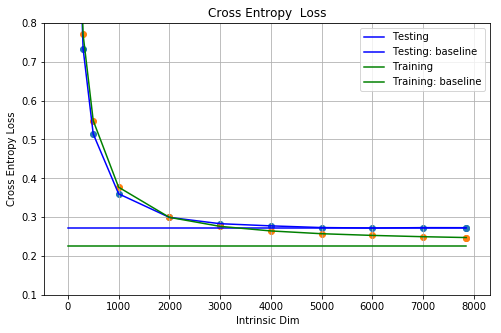

In [36]:
N = Rs.shape[0]
fig, ax = subplots(1)
ax.plot(dim, Rs[:,0],'b-', label="Testing")
ax.plot(dim, R_dir[0]*np.ones(N),'b-', label="Testing: baseline")
ax.plot(dim, Rs[:,2],'g-', label="Training")
ax.plot(dim, R_dir[2]*np.ones(N),'g-', label="Training: baseline")

ax.scatter(dim, Rs[:,0])
ax.scatter(dim, Rs[:,2])


ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss')
ax.set_title('Cross Entropy  Loss')
ax.legend()
ax.grid()
ax.set_ylim([0.1,0.8])
fig.set_size_inches(8, 5)

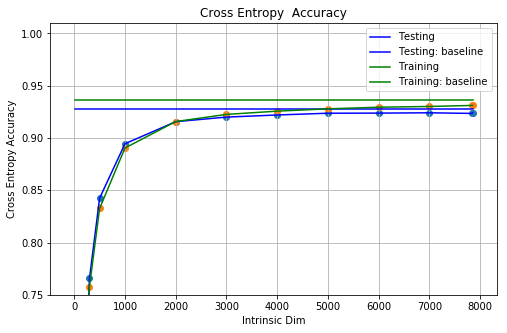

In [37]:
fig, ax = subplots(1)
ax.plot(dim, Rs[:,1],'b-', label="Testing")
ax.plot(dim, R_dir[1]*np.ones(N),'b-', label="Testing: baseline")
ax.plot(dim, Rs[:,3],'g-', label="Training")
ax.plot(dim, R_dir[3]*np.ones(N),'g-', label="Training: baseline")
ax.scatter(dim, Rs[:,1])
ax.scatter(dim, Rs[:,3])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Accuracy')
ax.set_title('Cross Entropy  Accuracy')
ax.legend()
ax.grid()
ax.set_ylim([0.75,1.01])
fig.set_size_inches(8, 5)

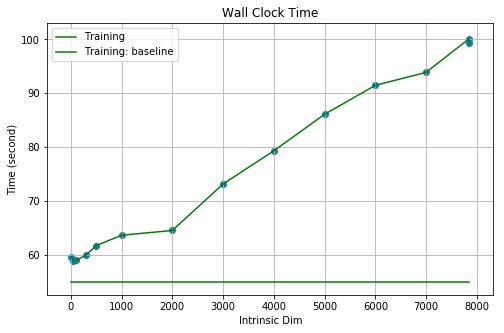

In [38]:
fig, ax = subplots(1)
ax.plot(dim, Rs[:,4],'g-', label="Training")
ax.plot(dim, R_dir[4]*np.ones(N),'g-', label="Training: baseline")
ax.scatter(dim, Rs[:,4])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Time (second)')
ax.set_title('Wall Clock Time')
ax.legend()
ax.grid()
# ax.set_ylim([0.75,100.01])
fig.set_size_inches(8, 5)

## Performance Per Dim

[[  2.23390000e-01   2.07300000e-02   2.24105000e-01   1.99100000e-02
    5.96453000e+00]
 [  3.80342000e-02   7.22600000e-03   3.86998000e-02   7.00480000e-03
    1.17674000e+00]
 [  1.52765000e-02   4.95500000e-03   1.57903000e-02   4.74640000e-03
    5.89677000e-01]
 [  2.44705000e-03   2.55200000e-03   2.56846667e-03   2.52586667e-03
    1.99904000e-01]
 [  1.02859000e-03   1.68480000e-03   1.09707000e-03   1.66520000e-03
    1.23453400e-01]
 [  3.60117000e-04   8.94500000e-04   3.77106000e-04   8.90420000e-04
    6.36534000e-02]
 [  1.49720500e-04   4.57800000e-04   1.49758000e-04   4.57860000e-04
    3.22696500e-02]
 [  9.43686667e-05   3.06666667e-04   9.20890000e-05   3.07520000e-04
    2.43898667e-02]
 [  6.93825000e-05   2.30500000e-04   6.61195000e-05   2.31420000e-04
    1.98313000e-02]
 [  5.46352000e-05   1.84740000e-04   5.14640000e-05   1.85576000e-04
    1.72201800e-02]
 [  4.53298333e-05   1.53966667e-04   4.21615000e-05   1.54906667e-04
    1.52454667e-02]
 [  3.8997

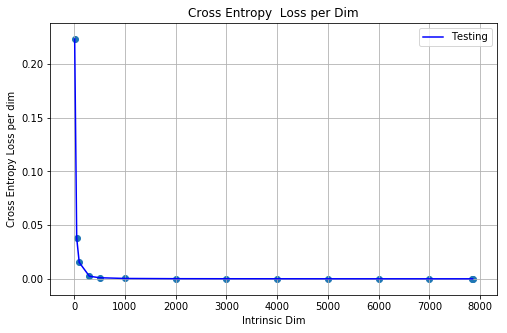

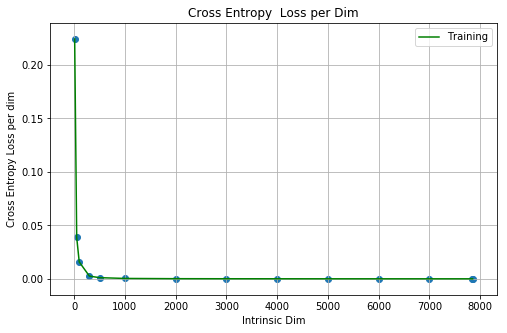

In [39]:
NRs = Rs/np.array(dim).reshape(N,1)
print NRs

fig, ax = subplots(1)
ax.plot(dim, NRs[:,0],'b-', label="Testing")
ax.scatter(dim, NRs[:,0])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss per dim')
ax.set_title('Cross Entropy  Loss per Dim')
ax.legend()
ax.grid()
fig.set_size_inches(8, 5)

fig, ax = subplots(1)
ax.plot(dim, NRs[:,2],'g-', label="Training")
ax.scatter(dim, NRs[:,2])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss per dim')
ax.set_title('Cross Entropy  Loss per Dim')
ax.legend()
ax.grid()
fig.set_size_inches(8, 5)

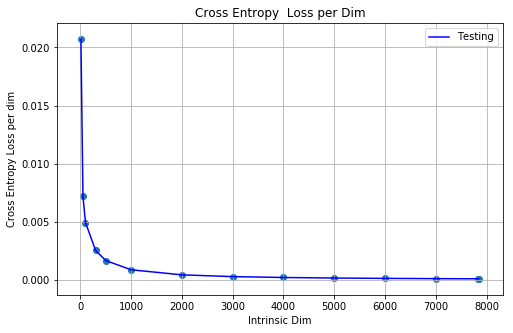

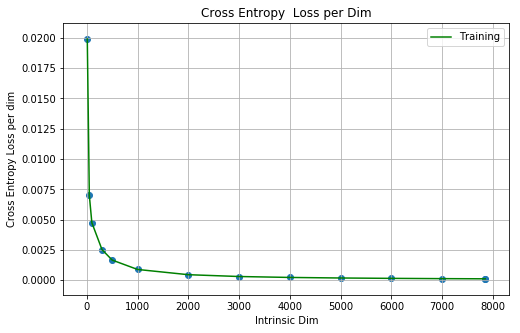

In [40]:
fig, ax = subplots(1)
ax.plot(dim, NRs[:,1],'b-', label="Testing")
ax.scatter(dim, NRs[:,1])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss per dim')
ax.set_title('Cross Entropy  Loss per Dim')
ax.legend()
ax.grid()
fig.set_size_inches(8, 5)

fig, ax = subplots(1)
ax.plot(dim, NRs[:,3],'g-', label="Training")
ax.scatter(dim, NRs[:,3])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss per dim')
ax.set_title('Cross Entropy  Loss per Dim')
ax.legend()
ax.grid()
fig.set_size_inches(8, 5)

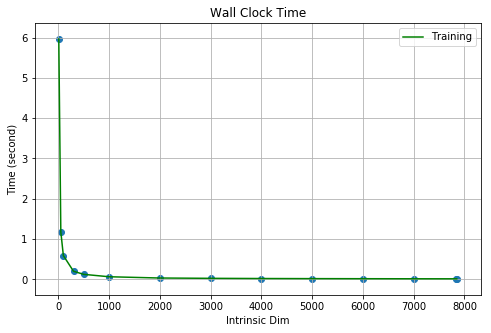

In [41]:
fig, ax = subplots(1)
ax.plot(dim, NRs[:,4],'g-', label="Training")
ax.scatter(dim, NRs[:,4])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Time (second)')
ax.set_title('Wall Clock Time')
ax.legend()
ax.grid()
# ax.set_ylim([0.75,100.01])
fig.set_size_inches(8, 5)